# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [ ]:
! pip install Pillow

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [ ]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (10/10), 11.01 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
!ls MNIST

processed  raw


In [ ]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [ ]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

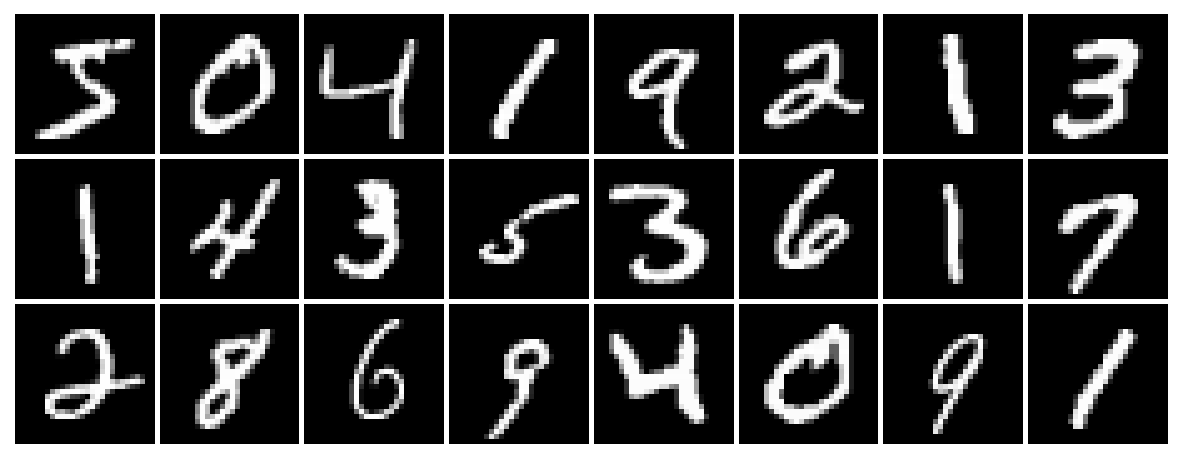

In [ ]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


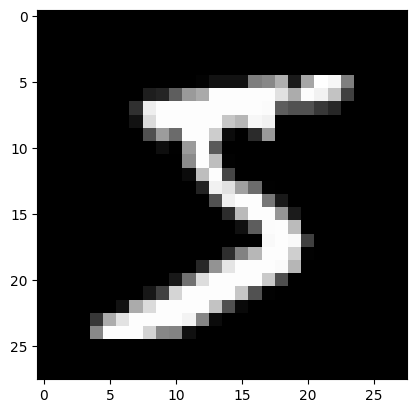

In [ ]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [ ]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-0.3872,  0.0760,  0.0194,  0.1086,  0.3584, -0.0809, -0.4467, -0.0084,
         -0.3220, -0.2066],
        [-0.5895, -0.0474,  0.3895,  0.1973,  0.3110, -0.1430, -0.2539, -0.0262,
         -0.2896, -0.1950],
        [-0.0262, -0.4443,  0.0967, -0.0379, -0.0565,  0.2480,  0.1446,  0.0993,
         -0.2982,  0.0306],
        [-0.1443,  0.0060,  0.0629, -0.0789,  0.1135,  0.0498, -0.0387,  0.2168,
         -0.3472, -0.1097],
        [-0.2410, -0.3557,  0.2325,  0.4334,  0.1211, -0.0464, -0.0148, -0.1824,
         -0.3457, -0.2500]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-7jl1zrnt
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-7jl1zrnt
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

In [ ]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3824, grad_fn=<NllLossBackward0>)

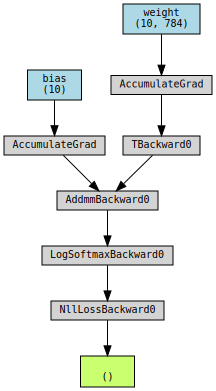

In [ ]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [ ]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [ ]:
print('Final loss:', loss.item())

Final loss: 0.2661595046520233


### Visualizando gráfico de perda durante o treinamento

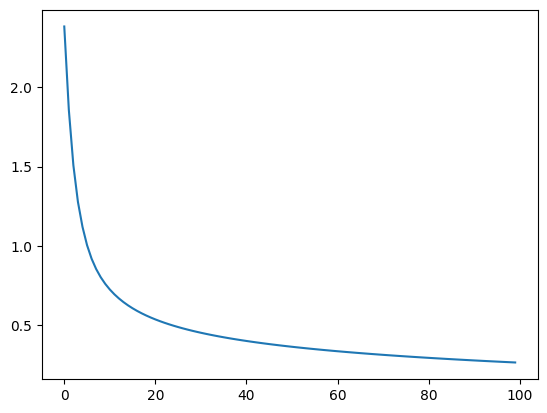

In [ ]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [ ]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.941


### Matriz de confusão com dados de treinamento e teste

In [ ]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,97,0,1,0,0,0,1,0,0,2
1,0,111,1,0,0,0,2,3,1,0
2,0,0,91,1,0,1,0,1,2,1
3,0,0,0,87,0,2,0,0,0,0
4,0,0,1,0,102,2,1,2,0,3
5,0,2,0,2,0,81,0,0,1,1
6,0,0,1,1,2,2,90,0,1,0
7,0,1,1,1,0,0,0,110,0,3
8,0,2,2,0,0,2,0,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


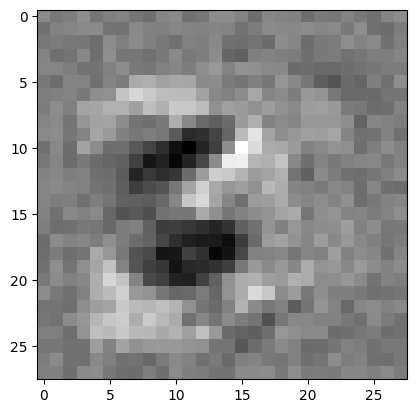

In [ ]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

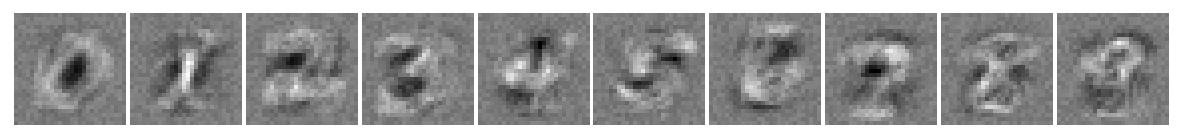

In [ ]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [ ]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # imprimir o numero da época, o loss e accuracy
    print(f'epoch {i+1}/{epochs}, Loss: {loss.item():.6f}, accuracy: {accuracy}')

epoch 1/100, Loss: 0.264816, accuracy: 0.941
epoch 2/100, Loss: 0.263489, accuracy: 0.942
epoch 3/100, Loss: 0.262178, accuracy: 0.942
epoch 4/100, Loss: 0.260882, accuracy: 0.942
epoch 5/100, Loss: 0.259600, accuracy: 0.943
epoch 6/100, Loss: 0.258334, accuracy: 0.943
epoch 7/100, Loss: 0.257082, accuracy: 0.944
epoch 8/100, Loss: 0.255843, accuracy: 0.944
epoch 9/100, Loss: 0.254619, accuracy: 0.944
epoch 10/100, Loss: 0.253408, accuracy: 0.944
epoch 11/100, Loss: 0.252210, accuracy: 0.944
epoch 12/100, Loss: 0.251025, accuracy: 0.944
epoch 13/100, Loss: 0.249853, accuracy: 0.944
epoch 14/100, Loss: 0.248694, accuracy: 0.944
epoch 15/100, Loss: 0.247546, accuracy: 0.945
epoch 16/100, Loss: 0.246410, accuracy: 0.946
epoch 17/100, Loss: 0.245287, accuracy: 0.948
epoch 18/100, Loss: 0.244174, accuracy: 0.948
epoch 19/100, Loss: 0.243073, accuracy: 0.948
epoch 20/100, Loss: 0.241983, accuracy: 0.948
epoch 21/100, Loss: 0.240904, accuracy: 0.95
epoch 22/100, Loss: 0.239836, accuracy: 0.95

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

epoch 1/100, Loss: 0.178393, accuracy: 0.968


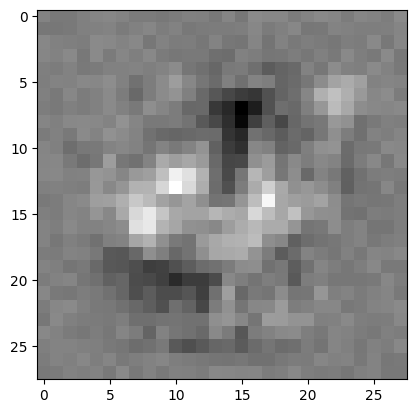

epoch 2/100, Loss: 0.177817, accuracy: 0.968


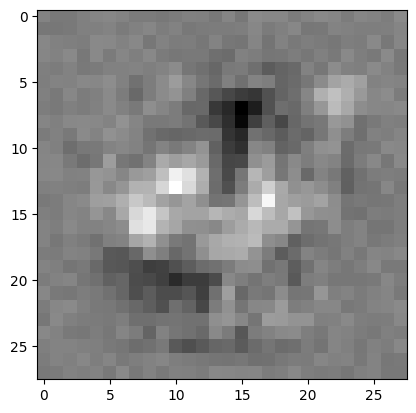

epoch 3/100, Loss: 0.177245, accuracy: 0.968


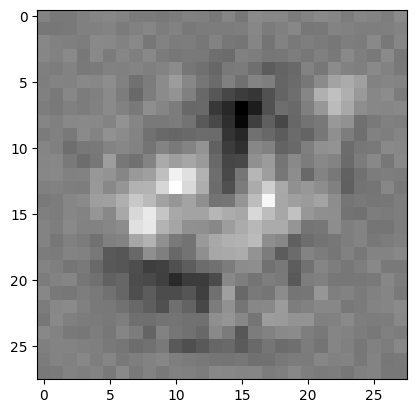

epoch 4/100, Loss: 0.176676, accuracy: 0.968


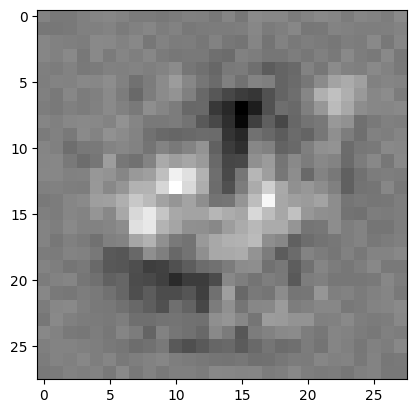

epoch 5/100, Loss: 0.176111, accuracy: 0.968


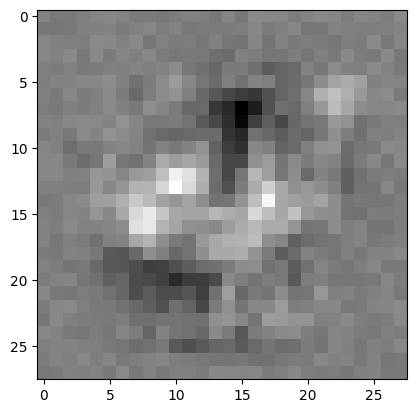

epoch 6/100, Loss: 0.175549, accuracy: 0.968


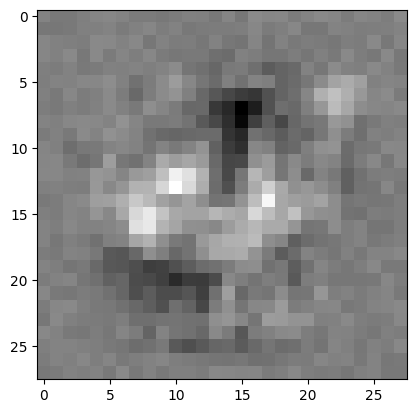

epoch 7/100, Loss: 0.174991, accuracy: 0.968


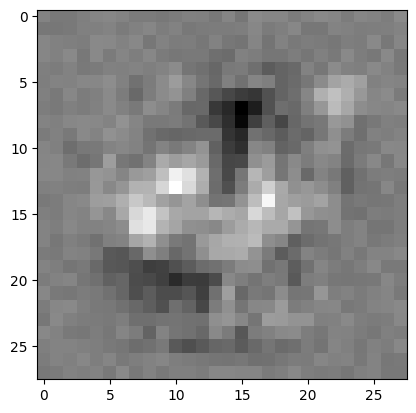

epoch 8/100, Loss: 0.174436, accuracy: 0.968


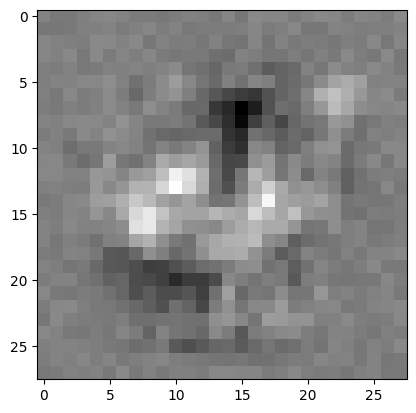

epoch 9/100, Loss: 0.173884, accuracy: 0.968


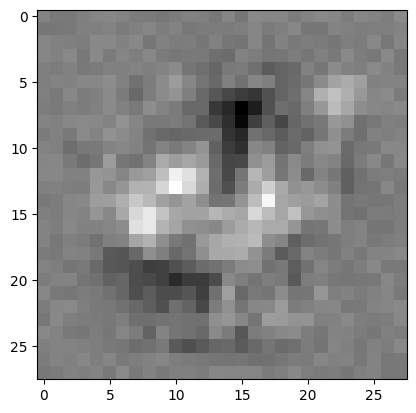

epoch 10/100, Loss: 0.173336, accuracy: 0.968


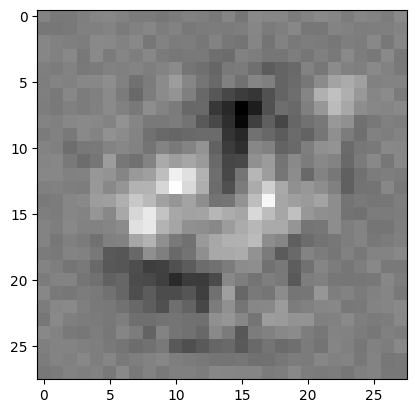

epoch 11/100, Loss: 0.172791, accuracy: 0.968


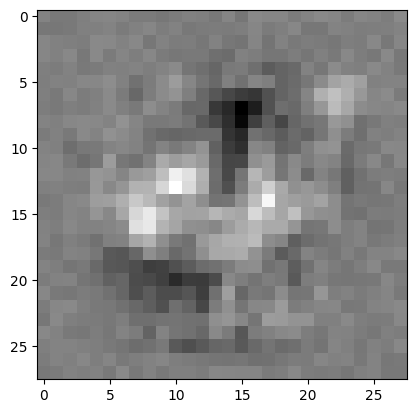

epoch 12/100, Loss: 0.172250, accuracy: 0.968


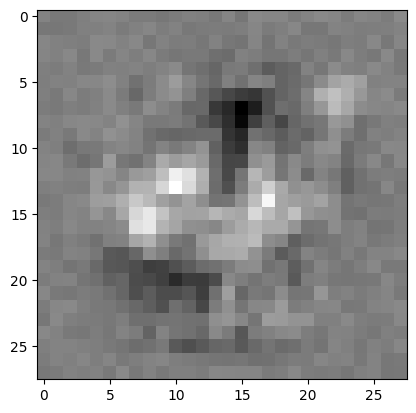

epoch 13/100, Loss: 0.171711, accuracy: 0.968


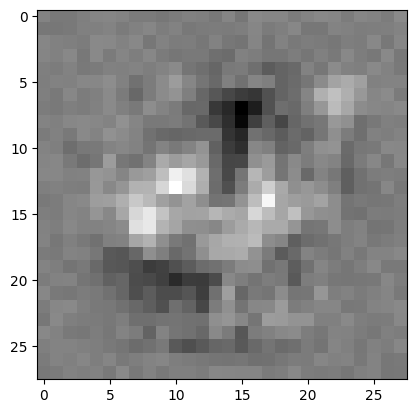

epoch 14/100, Loss: 0.171176, accuracy: 0.968


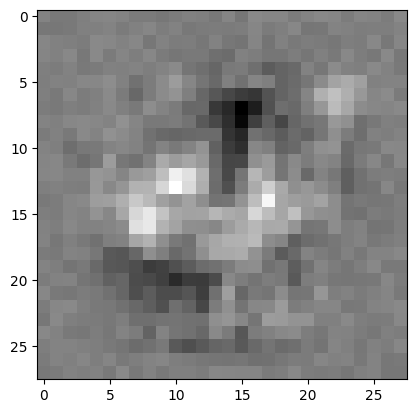

epoch 15/100, Loss: 0.170644, accuracy: 0.968


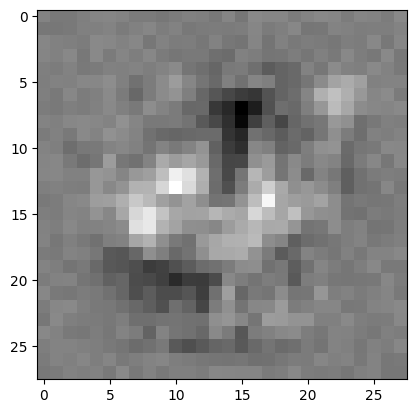

epoch 16/100, Loss: 0.170115, accuracy: 0.968


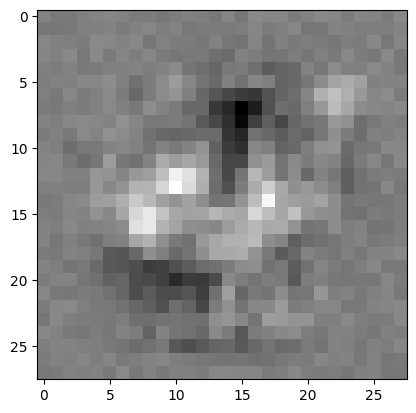

epoch 17/100, Loss: 0.169589, accuracy: 0.968


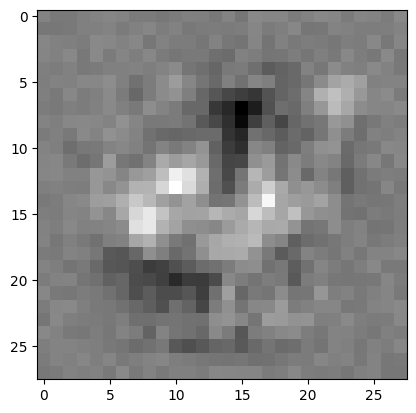

epoch 18/100, Loss: 0.169067, accuracy: 0.968


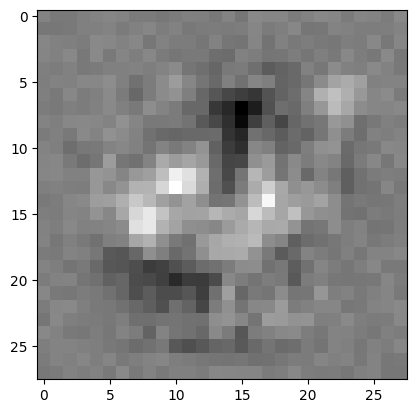

epoch 19/100, Loss: 0.168547, accuracy: 0.968


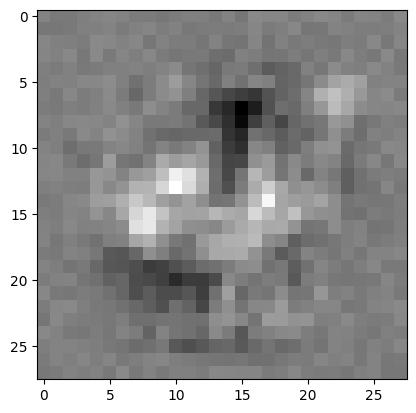

epoch 20/100, Loss: 0.168030, accuracy: 0.968


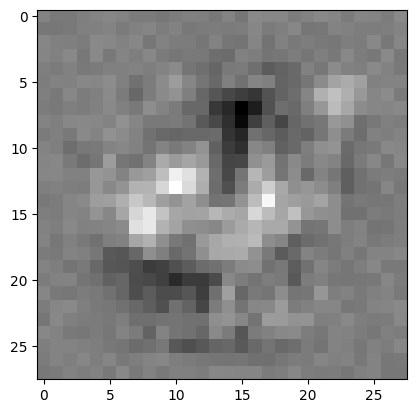

epoch 21/100, Loss: 0.167517, accuracy: 0.968


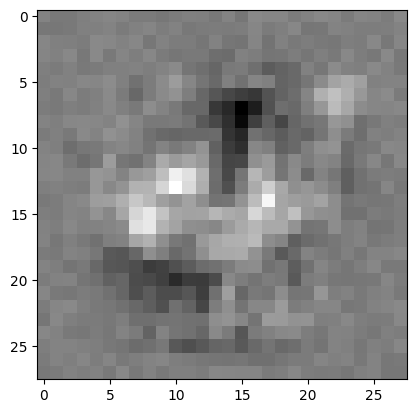

epoch 22/100, Loss: 0.167006, accuracy: 0.968


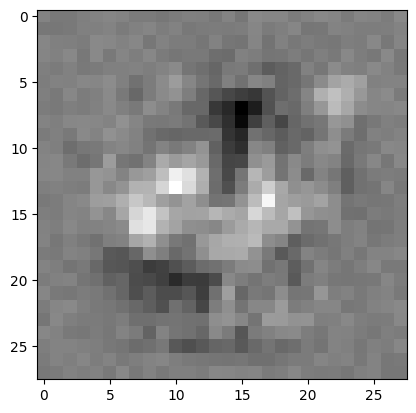

epoch 23/100, Loss: 0.166498, accuracy: 0.968


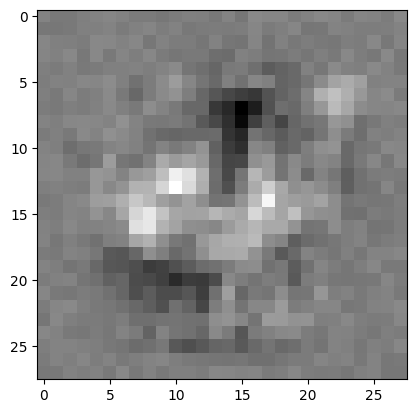

epoch 24/100, Loss: 0.165994, accuracy: 0.968


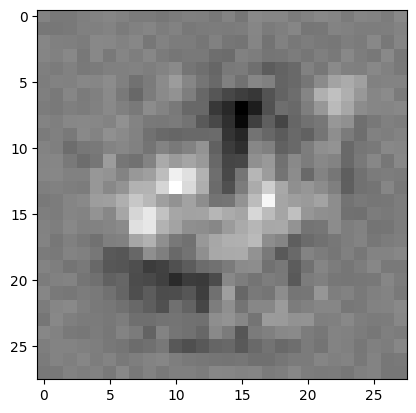

epoch 25/100, Loss: 0.165492, accuracy: 0.968


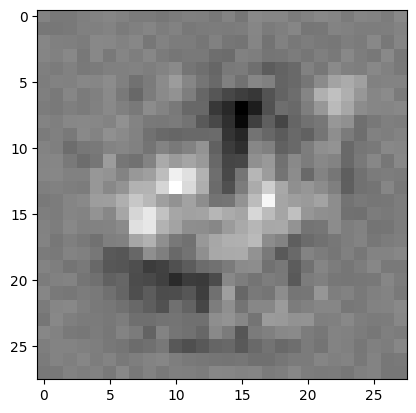

epoch 26/100, Loss: 0.164992, accuracy: 0.968


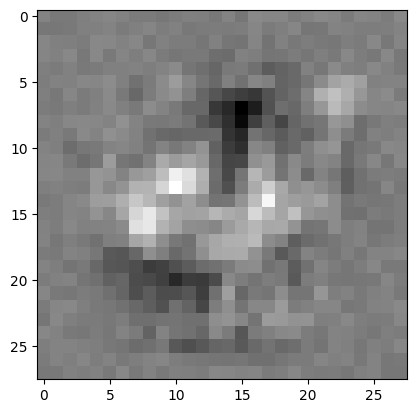

epoch 27/100, Loss: 0.164496, accuracy: 0.968


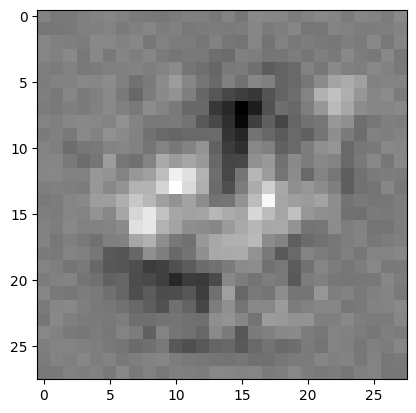

epoch 28/100, Loss: 0.164003, accuracy: 0.968


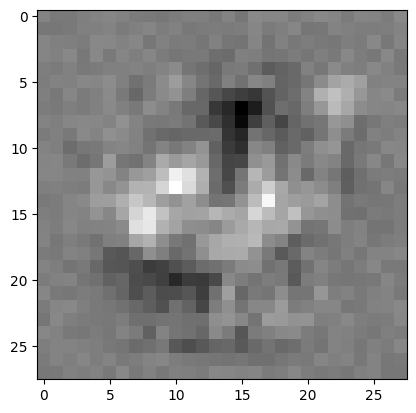

epoch 29/100, Loss: 0.163512, accuracy: 0.968


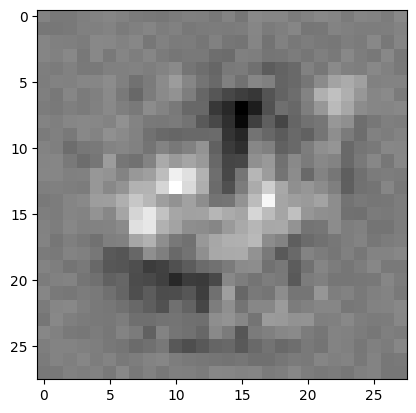

epoch 30/100, Loss: 0.163024, accuracy: 0.968


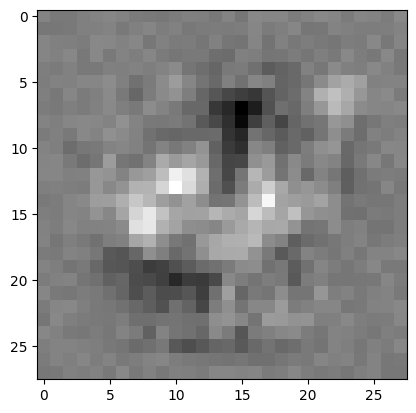

epoch 31/100, Loss: 0.162539, accuracy: 0.969


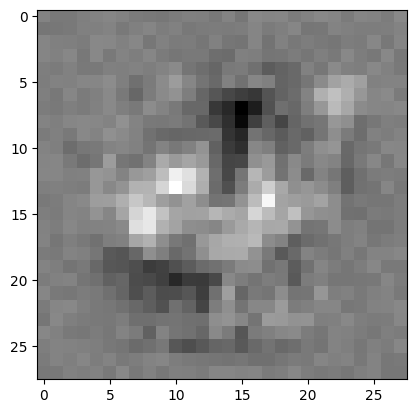

epoch 32/100, Loss: 0.162056, accuracy: 0.97


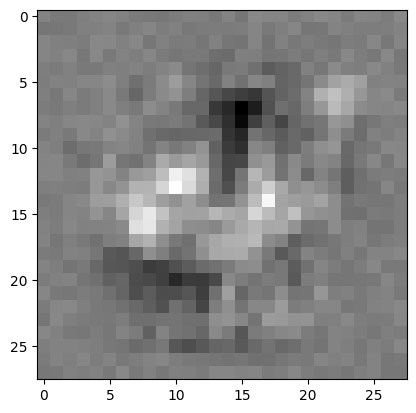

epoch 33/100, Loss: 0.161576, accuracy: 0.971


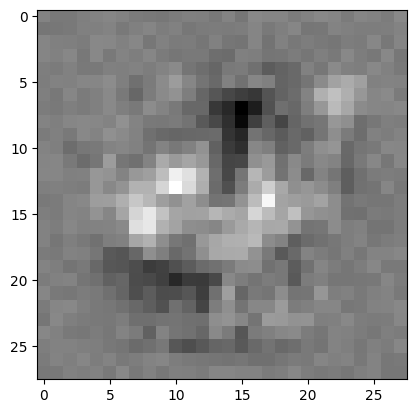

epoch 34/100, Loss: 0.161099, accuracy: 0.971


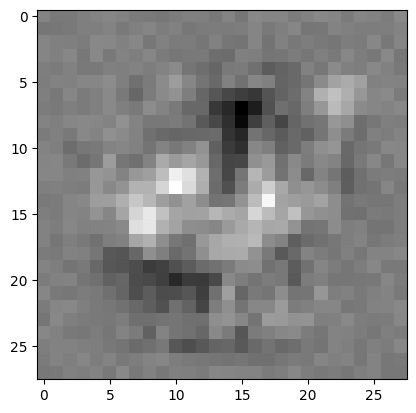

epoch 35/100, Loss: 0.160625, accuracy: 0.971


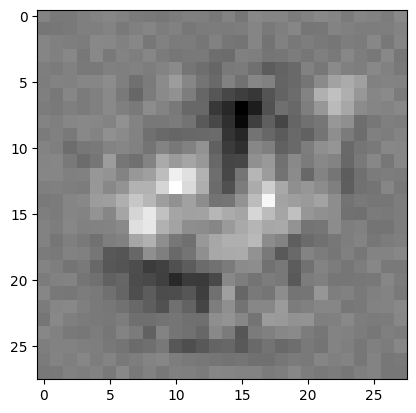

epoch 36/100, Loss: 0.160153, accuracy: 0.971


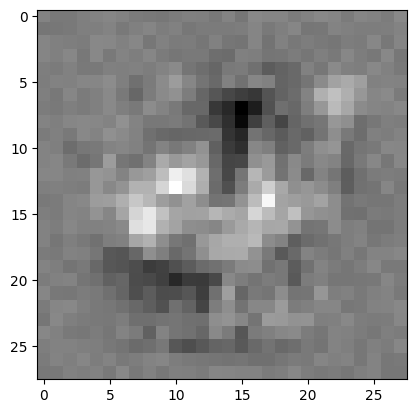

epoch 37/100, Loss: 0.159683, accuracy: 0.971


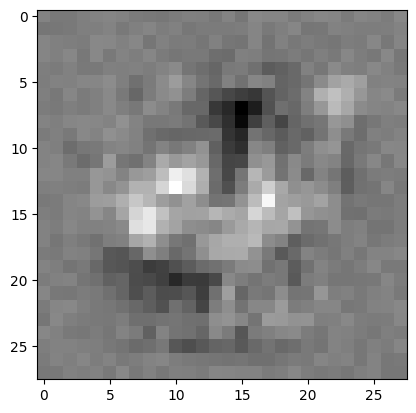

epoch 38/100, Loss: 0.159216, accuracy: 0.971


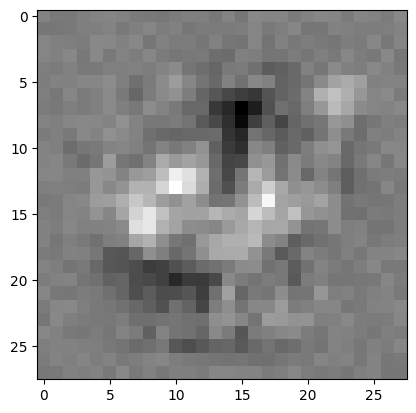

epoch 39/100, Loss: 0.158752, accuracy: 0.971


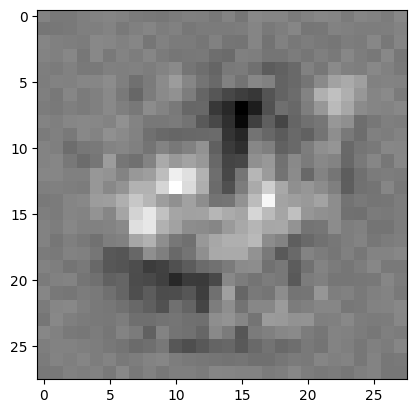

epoch 40/100, Loss: 0.158290, accuracy: 0.971


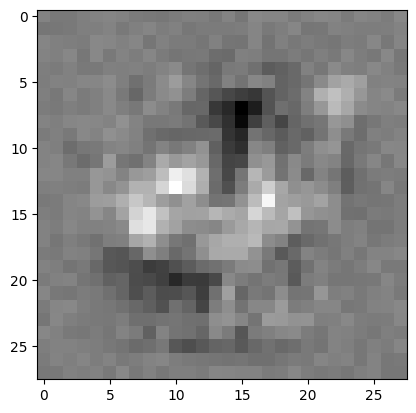

epoch 41/100, Loss: 0.157831, accuracy: 0.971


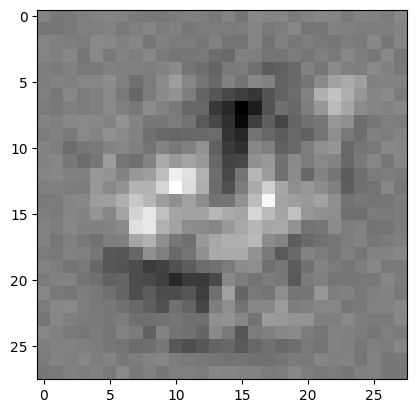

epoch 42/100, Loss: 0.157374, accuracy: 0.971


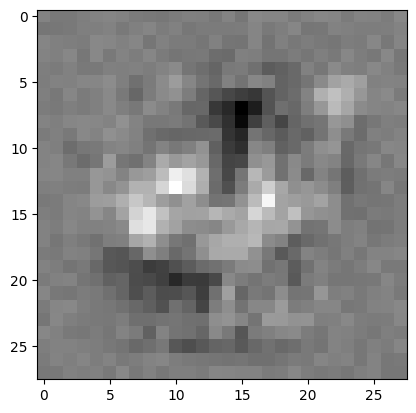

epoch 43/100, Loss: 0.156920, accuracy: 0.971


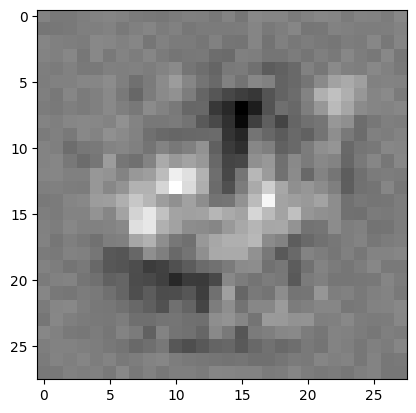

epoch 44/100, Loss: 0.156468, accuracy: 0.971


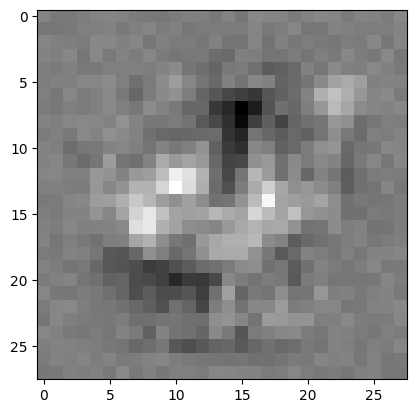

epoch 45/100, Loss: 0.156018, accuracy: 0.973


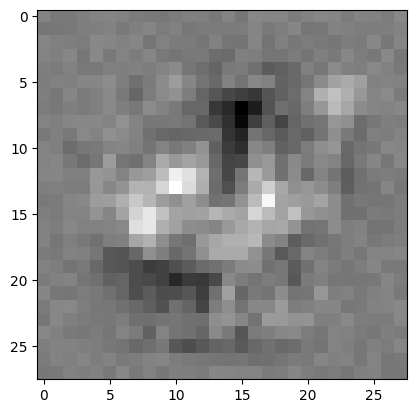

epoch 46/100, Loss: 0.155571, accuracy: 0.973


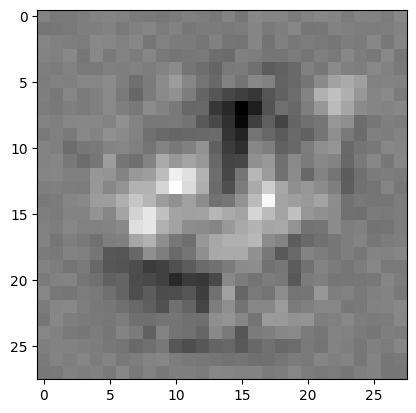

epoch 47/100, Loss: 0.155127, accuracy: 0.973


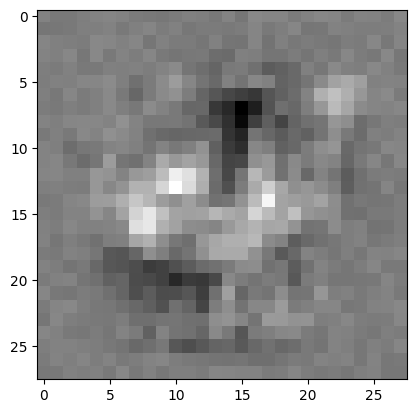

epoch 48/100, Loss: 0.154684, accuracy: 0.973


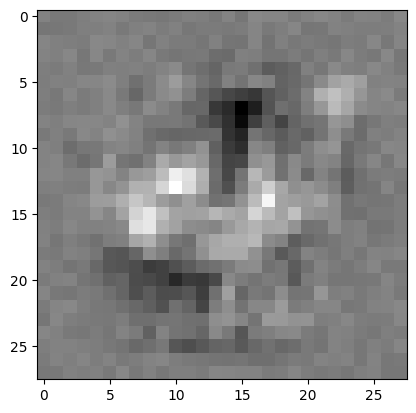

epoch 49/100, Loss: 0.154244, accuracy: 0.973


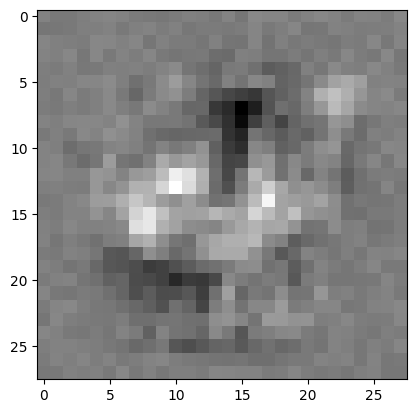

epoch 50/100, Loss: 0.153806, accuracy: 0.973


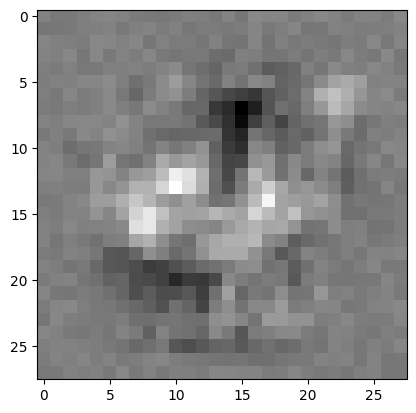

epoch 51/100, Loss: 0.153371, accuracy: 0.973


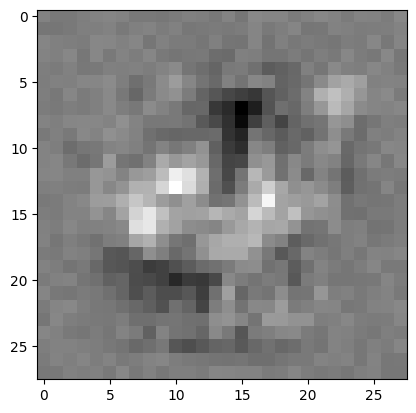

epoch 52/100, Loss: 0.152938, accuracy: 0.973


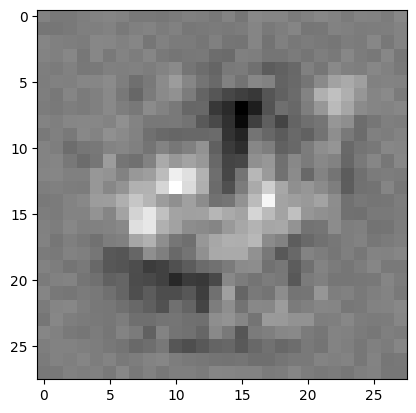

epoch 53/100, Loss: 0.152507, accuracy: 0.973


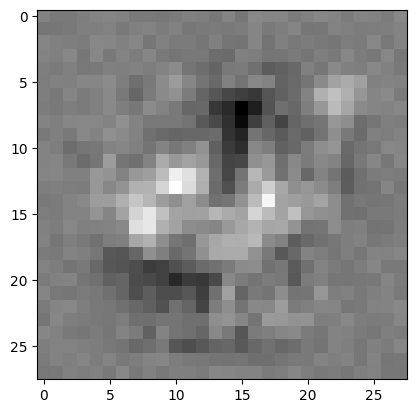

epoch 54/100, Loss: 0.152078, accuracy: 0.973


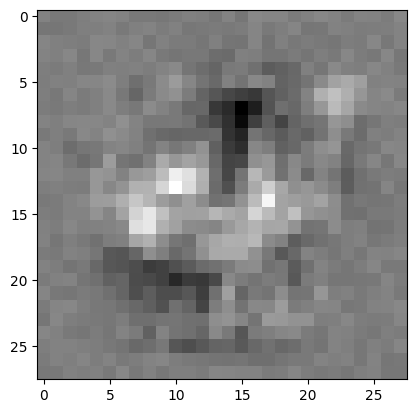

epoch 55/100, Loss: 0.151651, accuracy: 0.973


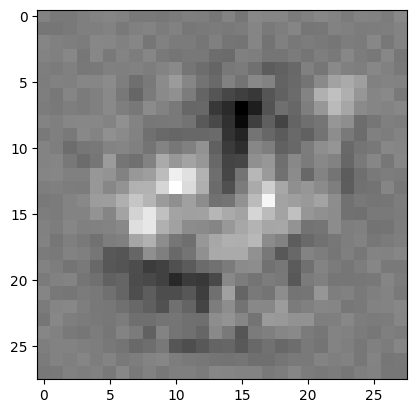

epoch 56/100, Loss: 0.151227, accuracy: 0.975


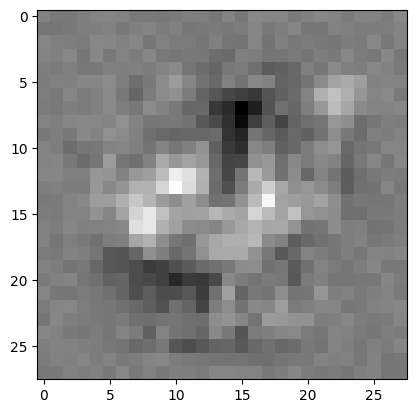

epoch 57/100, Loss: 0.150805, accuracy: 0.975


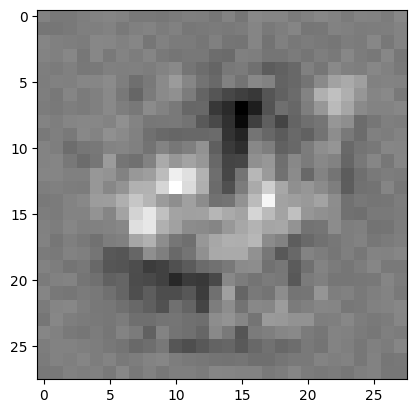

epoch 58/100, Loss: 0.150385, accuracy: 0.975


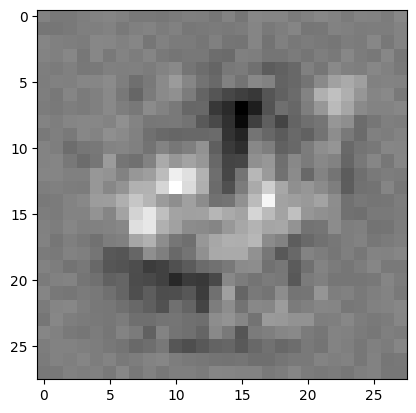

epoch 59/100, Loss: 0.149967, accuracy: 0.975


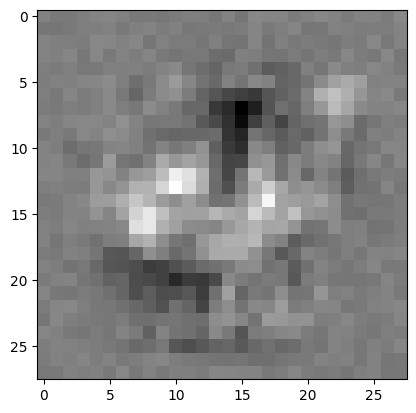

epoch 60/100, Loss: 0.149551, accuracy: 0.975


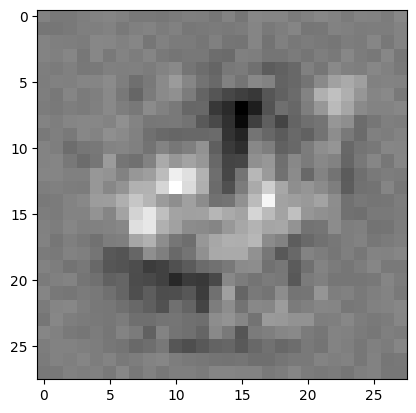

epoch 61/100, Loss: 0.149138, accuracy: 0.975


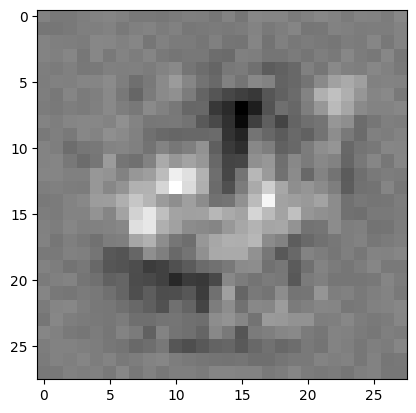

epoch 62/100, Loss: 0.148726, accuracy: 0.975


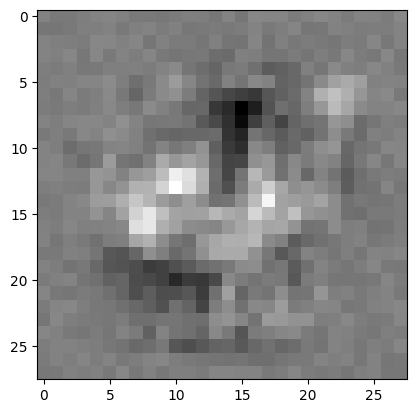

epoch 63/100, Loss: 0.148317, accuracy: 0.975


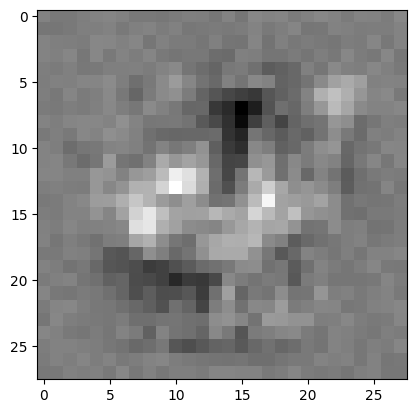

epoch 64/100, Loss: 0.147910, accuracy: 0.975


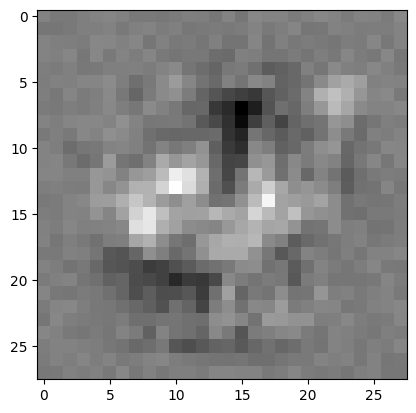

epoch 65/100, Loss: 0.147504, accuracy: 0.975


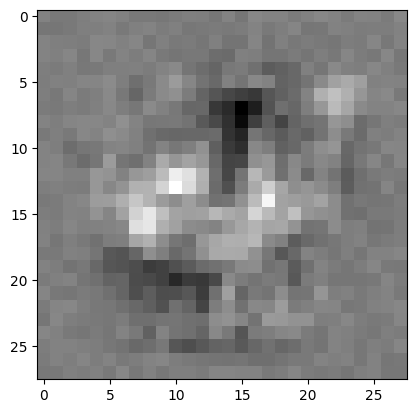

epoch 66/100, Loss: 0.147101, accuracy: 0.975


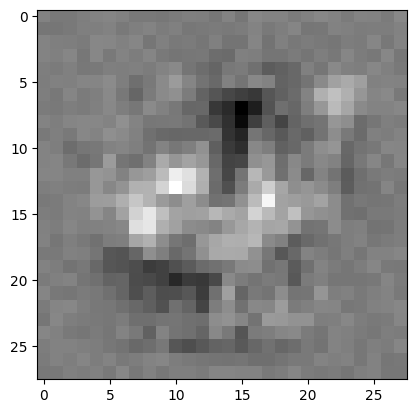

epoch 67/100, Loss: 0.146700, accuracy: 0.975


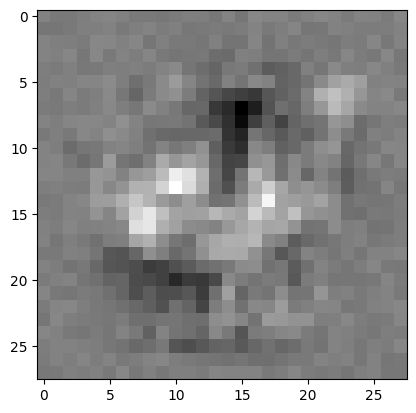

epoch 68/100, Loss: 0.146301, accuracy: 0.975


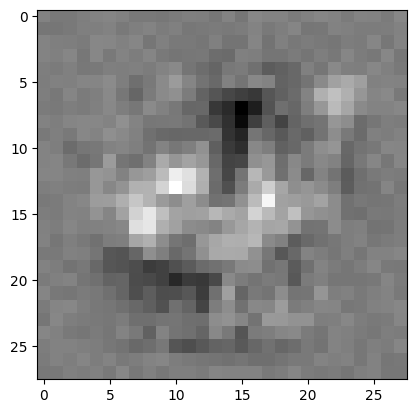

epoch 69/100, Loss: 0.145903, accuracy: 0.975


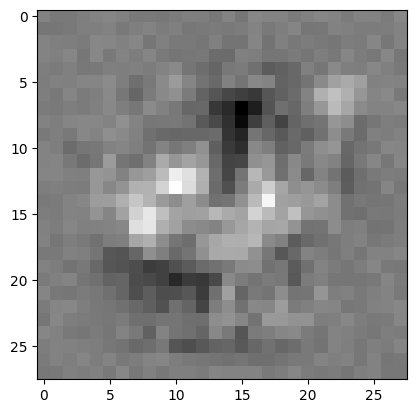

epoch 70/100, Loss: 0.145508, accuracy: 0.975


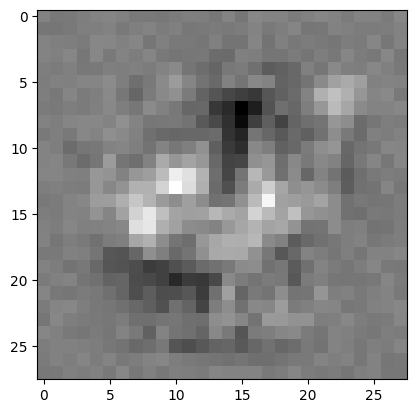

epoch 71/100, Loss: 0.145115, accuracy: 0.975


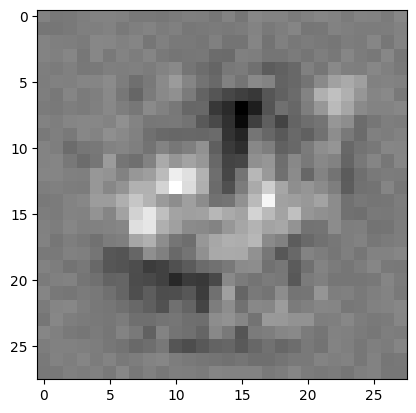

epoch 72/100, Loss: 0.144723, accuracy: 0.975


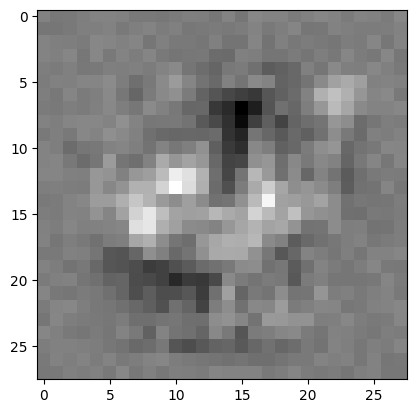

epoch 73/100, Loss: 0.144334, accuracy: 0.975


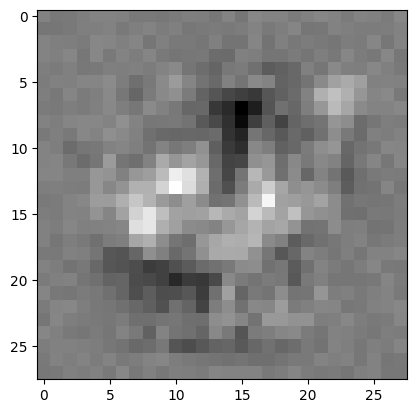

epoch 74/100, Loss: 0.143946, accuracy: 0.975


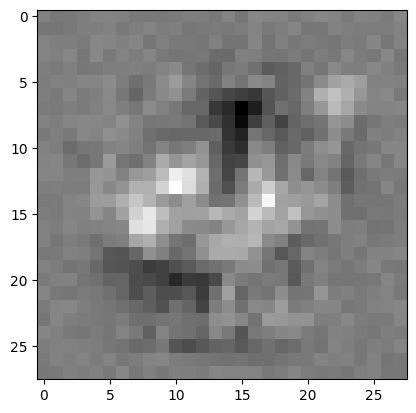

epoch 75/100, Loss: 0.143560, accuracy: 0.975


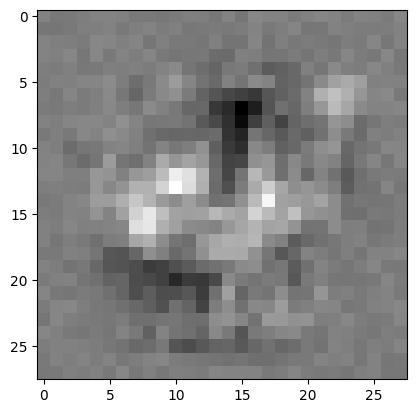

epoch 76/100, Loss: 0.143177, accuracy: 0.975


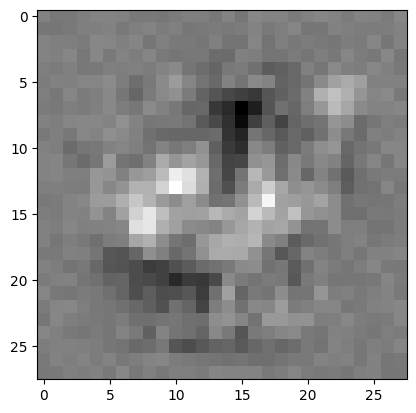

epoch 77/100, Loss: 0.142795, accuracy: 0.975


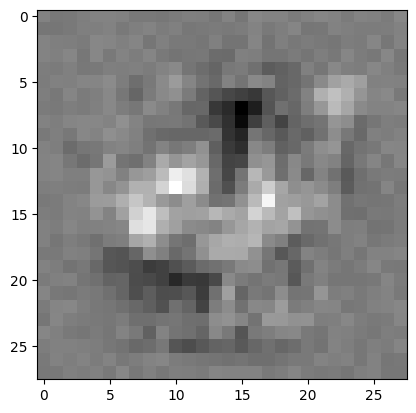

epoch 78/100, Loss: 0.142415, accuracy: 0.975


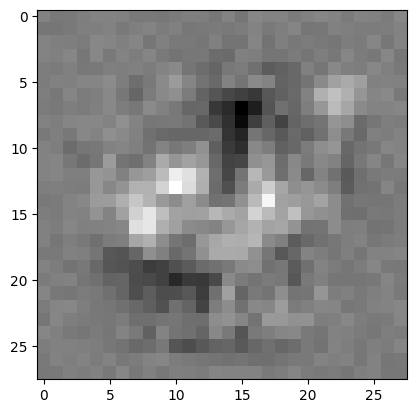

epoch 79/100, Loss: 0.142036, accuracy: 0.975


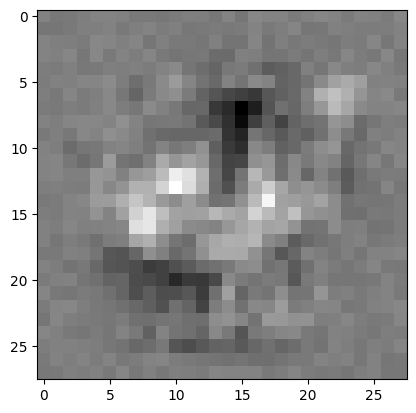

epoch 80/100, Loss: 0.141660, accuracy: 0.975


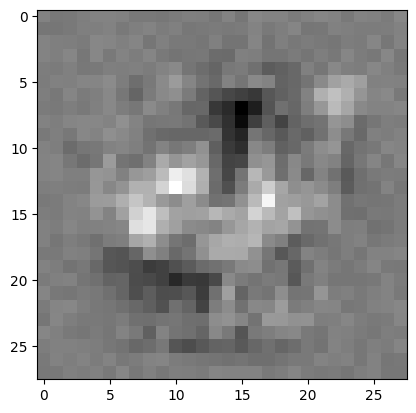

epoch 81/100, Loss: 0.141285, accuracy: 0.975


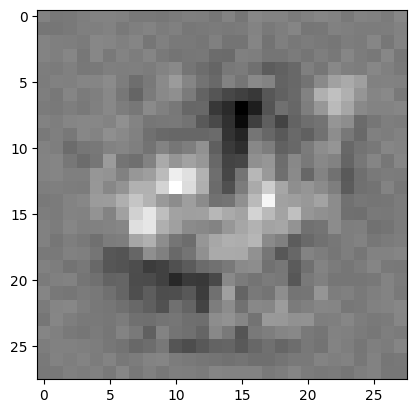

epoch 82/100, Loss: 0.140913, accuracy: 0.975


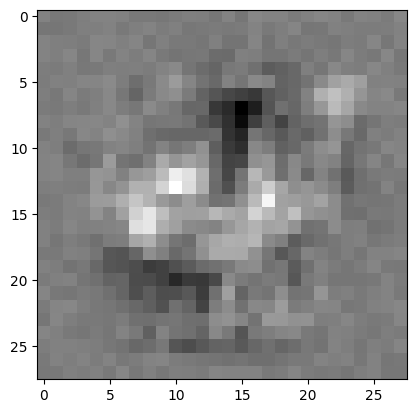

epoch 83/100, Loss: 0.140542, accuracy: 0.975


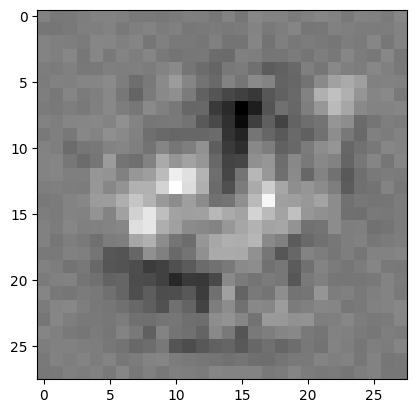

epoch 84/100, Loss: 0.140172, accuracy: 0.975


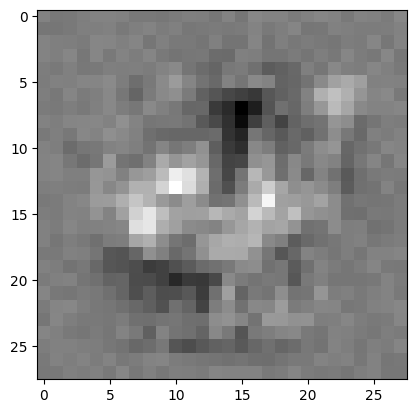

epoch 85/100, Loss: 0.139805, accuracy: 0.976


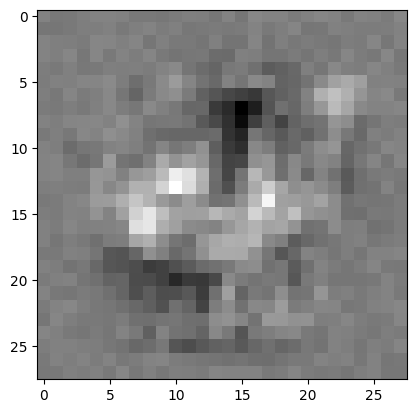

epoch 86/100, Loss: 0.139439, accuracy: 0.976


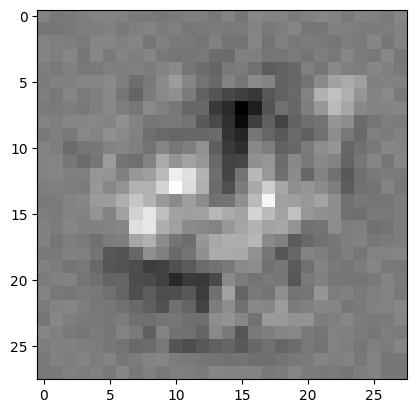

epoch 87/100, Loss: 0.139075, accuracy: 0.976


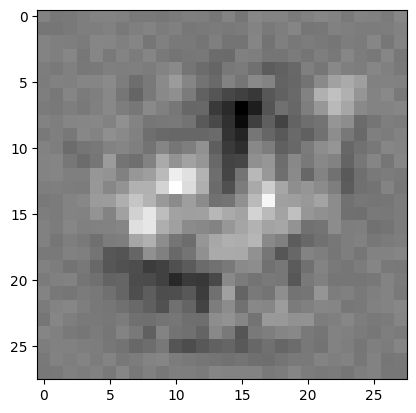

epoch 88/100, Loss: 0.138713, accuracy: 0.976


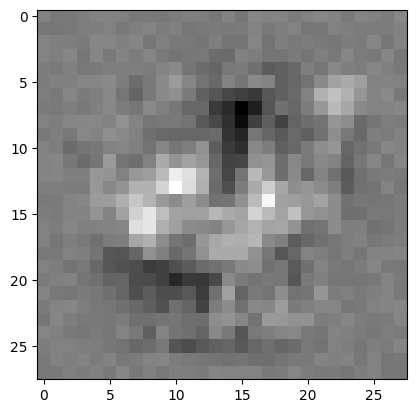

epoch 89/100, Loss: 0.138352, accuracy: 0.976


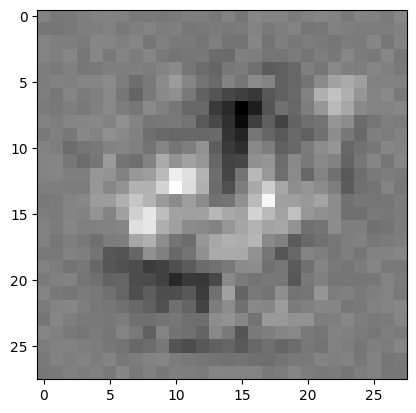

epoch 90/100, Loss: 0.137994, accuracy: 0.976


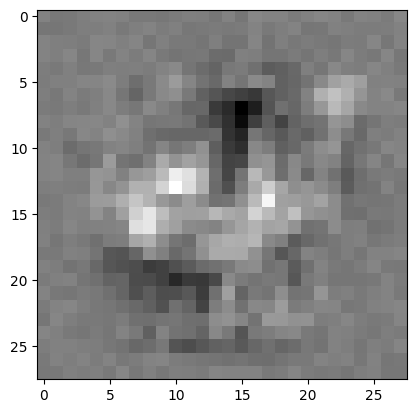

epoch 91/100, Loss: 0.137636, accuracy: 0.976


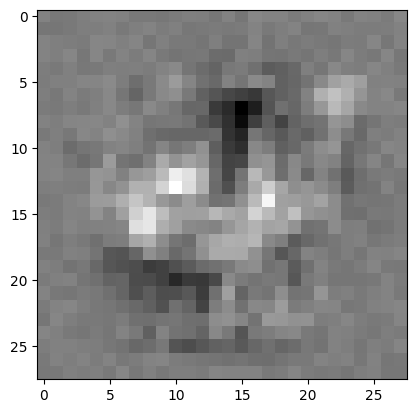

epoch 92/100, Loss: 0.137281, accuracy: 0.976


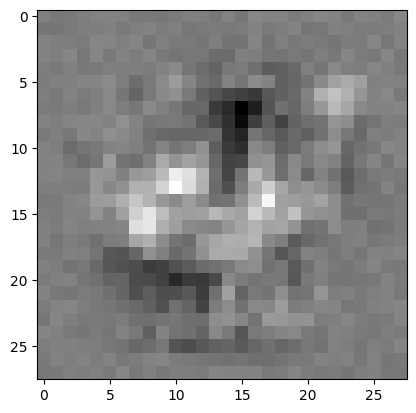

epoch 93/100, Loss: 0.136927, accuracy: 0.976


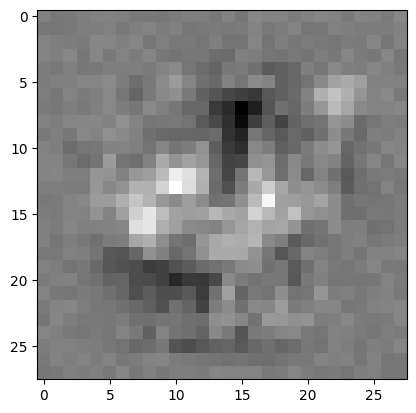

epoch 94/100, Loss: 0.136575, accuracy: 0.976


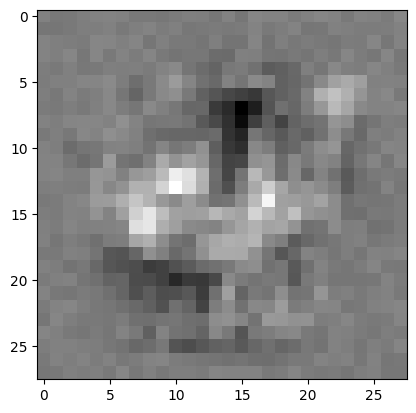

epoch 95/100, Loss: 0.136224, accuracy: 0.976


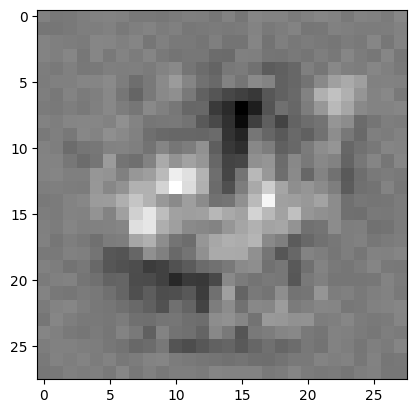

epoch 96/100, Loss: 0.135875, accuracy: 0.976


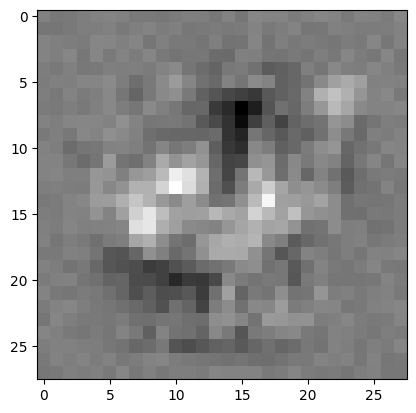

epoch 97/100, Loss: 0.135528, accuracy: 0.976


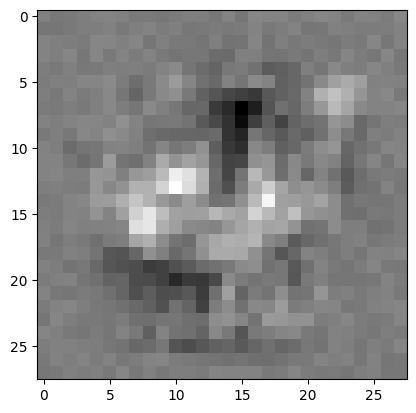

epoch 98/100, Loss: 0.135183, accuracy: 0.976


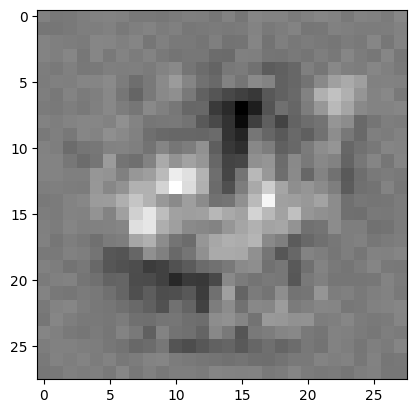

epoch 99/100, Loss: 0.134838, accuracy: 0.976


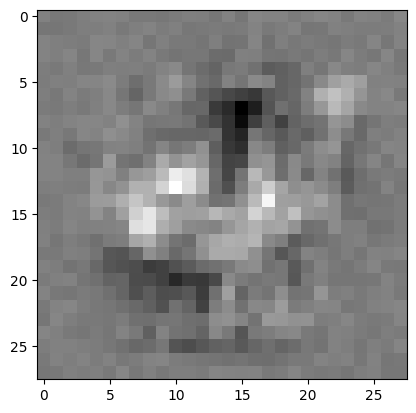

epoch 100/100, Loss: 0.134496, accuracy: 0.976


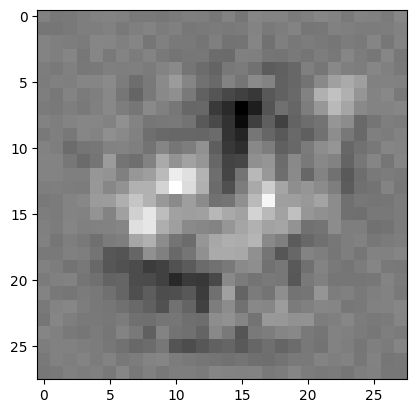

In [ ]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # imprimir o numero da época, o loss e accuracy

    print(f'epoch {i+1}/{epochs}, Loss: {loss.item():.6f}, accuracy: {accuracy}')

    weights = model.state_dict()['weight']
    # print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    # print('bias:   ', bias.shape)

    # Visualizando pesos da classe 4
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
- R.: 1000, 28, 28
2. Qual é o shape da saída da rede?
- R.: 1000, 10
3. Qual é o número total de parâmetros da rede, incluindo o bias?
- R.: 7850

# Aprendizados
